# Computation

If there any error occurs, please visit previous section to check all requirements [←](1_initialization.ipynb).

## Computation prepare

Prior starting the computation there needs to be defined several settings.


In [20]:
start_point = {'day': 1, 'month': 1, 'year': 2022}
end_point = {'day': 0, 'month': 1, 'year': 2022}  # leave day=0 for full month
granularity = {'day': 0, 'hour': 1, 'minute':0}  # please input only one value / rest 0

## Let's run

...

In [30]:
from calendar import monthrange
import pandas as pd
from skyfield.api import load, Topos

planets = load('./source/de430.bsp')
earth, moon = planets['earth'] + Topos('50.1 N', '14.4 E'), planets['moon']
data = []
timescale = []  # list of time values
declination = []  # list of computed values
ts = load.timescale()

def format_time(year, month, day, hour=12, minute=0):
    if not year or not month or not day:
        return
    else:
        return ts.utc(year, month, day, hour, minute).utc_strftime('%Y-%m-%d %H:%M')

# iteration that connects values for time and computation together
for year in range(start_point['year'], end_point['year']+1):
    for month in range(start_point['month'], end_point['month']+1):
        day_finish = end_point['day'] if end_point['day'] else monthrange(year, month)[1]
        for day in range(start_point['day'], day_finish + 1):
            if granularity['hour'] or granularity['minute']:
                for hour in range(1, 25):
                    if granularity['minute']:
                        for minute in range(1, 61):
                            data.append([format_time(year, month, day, hour, minute),
                                        earth.at(time).observe(moon).radec()[1].radians,
                                        earth.at(time).observe(moon).radec()[-1].au])
                    else:  # case hourly reporting at 0 minutes 
                        data.append([format_time(year, month, day, hour),
                                    earth.at(time).observe(moon).radec()[1].radians,
                                    earth.at(time).observe(moon).radec()[-1].au])
            else:  # case daily reporting at 12:00 every day
                data.append([format_time(year, month, day),
                            earth.at(time).observe(moon).radec()[1].radians,
                            earth.at(time).observe(moon).radec()[-1].au])

df = pd.DataFrame(data, columns=['date_time', 'declination', 'distance'])
df.to_csv('./result/computed.csv')

## Further analysis

...


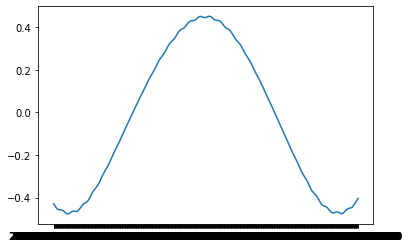

In [19]:
peak_df = df[(df.shift(1) < df) & (df.shift(-1) < df)]


import matplotlib.pyplot as plt

plt.plot(timescale, declination)
plt.show()